# Analyse prédictive des cours des actions FAANG

Réalisé par :
* ESSOH Lasme Ephrem Dominique
* ELAOUNI Fouzia

# Introduction

Dans ce travail, nous examinerons les données du marché boursier, en particulier celles des firmes technologique. Plus précisement, nous ménons une analyse prédictive des cours des actions FAANG.  

FAANG fait référence aux actions de cinq sociétés technologiques américaines de premier plan : Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX) ; et Alphabet ou Google (GOOG). Le terme a été inventé par Jim Cramer, l'animateur de télévision de Mad Money de CNBC, en 2013, qui a félicité ces entreprises pour être totalement dominantes sur leurs marchés.

# 1 Chargement du jeu de données et traitement des données

## Installation du module pandas_datareader

Nous utilisons le module <b>pandas_datareader</b> afin de récuperer les données, par scrapping, du cours des actions du stock market FAANG. La source de données utilisée est <a href = "https://finance.yahoo.com/"> Yahoo! La finance </a>.

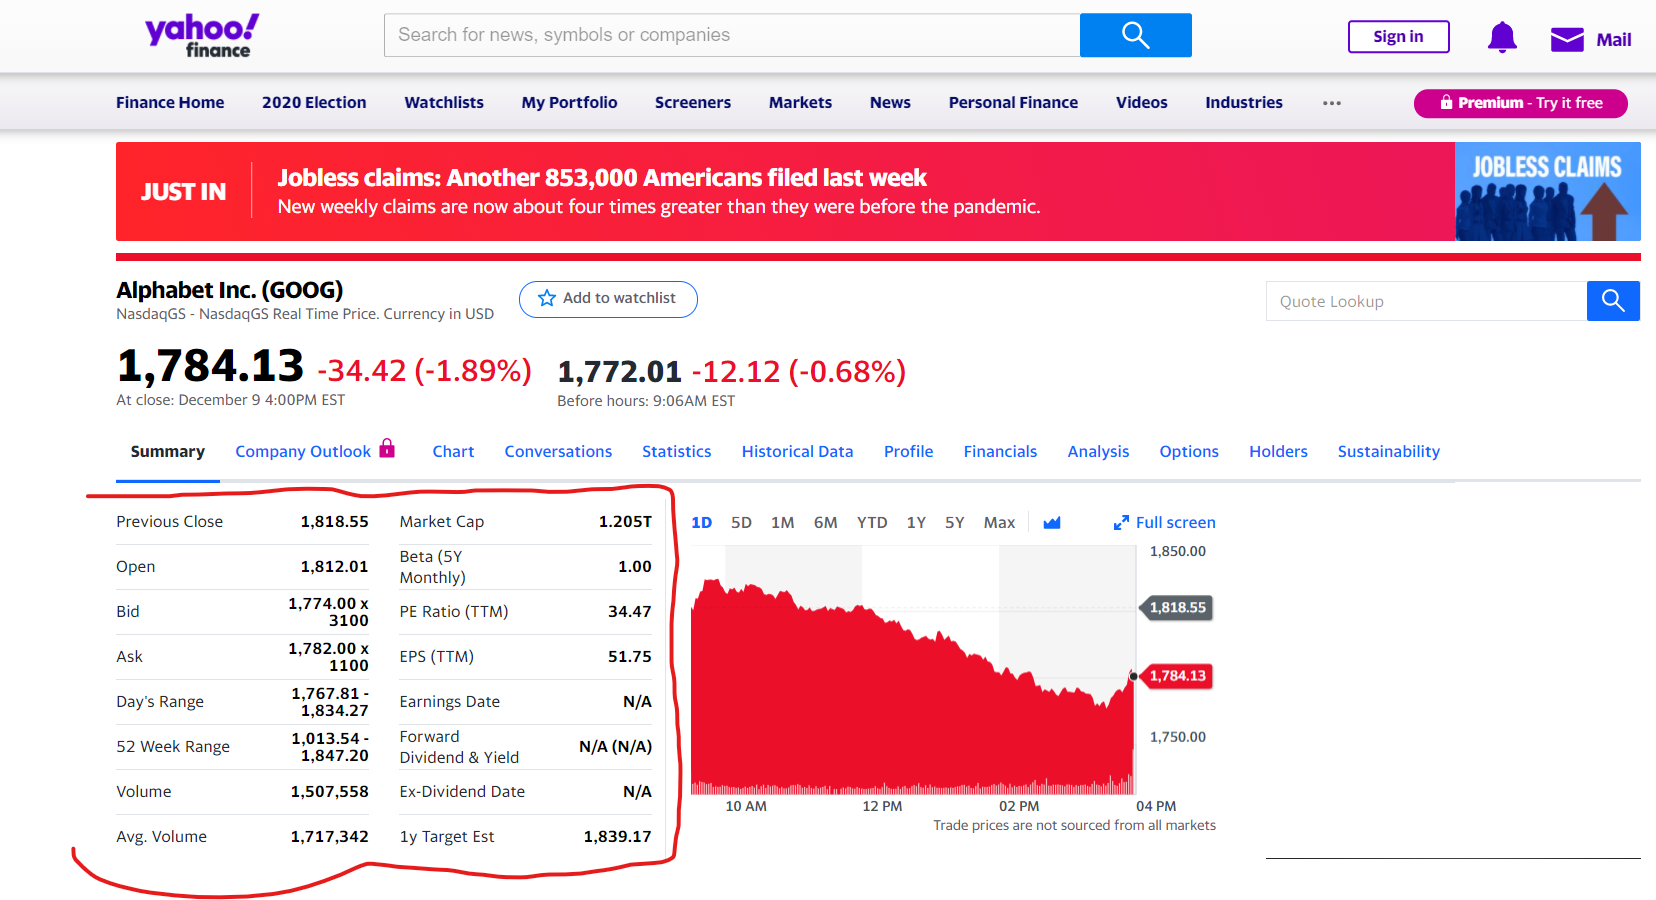

In [1]:
from IPython.display import Image
Image("img_yahoo_finance.png")

In [12]:
import sys
!{sys.executable} -m pip install pandas_datareader

## Récupération des données

In [4]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader #pour récup. les datas sur yahoo finance !
from datetime import datetime #gestion de dates

### récupération des séries temporelles des cours des actions pour chacune des 5 firmes étudiées

Nous construisons une fonction de récupération des données, via Yahoo Finance par Scrapping à travers DataReader, sur les cours de actions de FACEBOOK, APPLE, AMAZON, NETFLIX et GOOGLE. Ensuite, nous constituons des données de panel à partir de cette récupération. Les paramètre de notre fonction sont essentiellements la date de début et la date de fin pour lesquelles on souhaite disposer des données.

In [197]:
def recup_donnees(date_debut, date_fin) :
    # liste des firmes de la tech
    FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']

    # date de début et date de fin d'extraction des données : extraction de 1 année complète + 1 année retrospective de cours
    fin = date_fin
    debut = date_debut
    
    # récupération des séries temporelles FB, AAPL, AMZN, NFLX et GOOG
    for stock in FAANG :   
        globals()[stock] = DataReader(stock, 'yahoo', debut, fin)
    
    # constitution de notre panel de données
    liste_firme = [FB, AAPL, AMZN, NFLX, GOOG]
    nom_firme = ["FACEBOOK", "APPLE", "AMAZON", "NETFLIX", "GOOGLE"]

    for firme, nom in zip(liste_firme, nom_firme):
        firme["Nom firme"] = nom
    
    data = pd.concat(liste_firme, axis = 0)
    
    return data

### Affichage des données de panel

Ci-dessous figure le jeu de données entre le jour d'aujourd'hui et le jour d'aujourd'hui diminué d'une année. Par exemple, au jour du 10/12/2020 d'utilisation de ce notebook, les données couvrent la période allant du 10/12/2019 au 10/12/2020.

In [202]:
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)
data = recup_donnees(debut, fin)

In [203]:
data

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2019-12-13,196.800003,193.169998,196.399994,194.110001,18798000.0,194.110001,FACEBOOK
2019-12-16,199.119995,194.809998,195.270004,197.919998,14911500.0,197.919998,FACEBOOK
2019-12-17,199.000000,196.130005,198.839996,198.389999,10175700.0,198.389999,FACEBOOK
2019-12-18,204.300003,200.089996,200.089996,202.500000,23274400.0,202.500000,FACEBOOK
2019-12-19,206.300003,202.509995,202.779999,206.059998,16514600.0,206.059998,FACEBOOK
...,...,...,...,...,...,...,...
2020-12-07,1832.369995,1805.780029,1819.000000,1819.479980,1320900.0,1819.479980,GOOGLE
2020-12-08,1821.900024,1796.204956,1810.099976,1818.550049,1096300.0,1818.550049,GOOGLE
2020-12-09,1834.270020,1767.810059,1812.010010,1784.130005,1507600.0,1784.130005,GOOGLE


In [208]:
# liste des variables
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
Nom firme     object
dtype: object

### 2 exemples du format des données

Nous avons récupéré au total 5 séries temporelles (celles de FB, de AAPL, de AMZN, de NFLX et de GOOG) que nous avons rassemblées pour constituer un panel de données. Chaque séries temporelles contient 5 variables :

* High = la valeur maximale du cours de l'action au jour aaaa-mm-jj (en USD)
* Low = la valeur minimale du cours de l'action au jour aaaa-mm-jj (en USD)
* Open = la valeur du cours de l'action à l'overture du marché au jour aaaa-mm-jj (en USD)
* Close = la valeur du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)
* Volume = le volume total d'action négociés au jour aaaa-mm-jj (en nombre absolu)
* Adj Close = la valeur ajustée (par rapport au dividendes) du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)

Par exemple, affichons 5 observations au harsard des données de FACEBOOK et APPLE :

In [226]:
def donnees_firme(nom_firme):
    return data.loc[data["Nom firme"] == nom_firme]

In [228]:
donnees_firme("FACEBOOK").sample(5)

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2020-05-06,211.600006,206.660004,208.119995,208.470001,21857000.0,208.470001,FACEBOOK
2020-06-08,231.550003,227.410004,229.029999,231.399994,15466500.0,231.399994,FACEBOOK
2020-03-09,175.000000,165.190002,169.600006,169.500000,29949000.0,169.500000,FACEBOOK
2020-05-04,205.910004,198.759995,200.199997,205.259995,19250700.0,205.259995,FACEBOOK
2020-08-07,278.890015,263.429993,264.079987,268.440002,72735500.0,268.440002,FACEBOOK


In [229]:
donnees_firme("APPLE").sample(5)

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2020-09-29,115.309998,113.570000,114.550003,114.089996,99382200.0,113.893501,APPLE
2020-09-23,112.110001,106.769997,111.620003,107.120003,150718700.0,106.935509,APPLE
2020-04-29,72.417503,70.972504,71.182503,71.932503,137280800.0,70.905334,APPLE
2020-02-25,75.632500,71.532501,75.237503,72.019997,230673600.0,70.991577,APPLE
2020-10-12,125.180000,119.279999,120.059998,124.400002,240226800.0,124.185753,APPLE


# 2. Statistique descriptive et visualisation

### Niveau moyen des cours et du volume des actions négociés

In [178]:
vm_stock_2020 = round(data.groupby([(data.index.year), (data["Nom firme"])]).mean().loc[2020,:],2)
vm_stock_2020

,High,Low,Open,Close,Volume,Adj Close
Nom firme,,,,,,
AMAZON,2687.94,2612.51,2651.58,2651.40,4.999288e+06,2651.40
APPLE,94.76,92.02,93.37,93.45,1.470190e+08,92.92
FACEBOOK,235.86,228.69,232.24,232.46,2.275318e+07,232.46
GOOGLE,1484.77,1447.30,1464.78,1466.94,1.913517e+06,1466.94
NETFLIX,450.20,434.10,441.99,442.55,7.126442e+06,442.55


### Evolution du cours des actions journalières

Cette évolution sera appréciée à l'aide du profil temporel de la valeur ajustée du cours de l'action, ajustée à la fermeture du marché.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
def profil_temporel(var, dim_fig1, dim_fig2, subplot1, subplot2):
    plt.figure(figsize=(dim_fig1, dim_fig2))
    plt.subplots_adjust(top=1.25, bottom=1.2)
    for i, nom in enumerate(nom_firme, 1):
        plt.subplot(subplot1, subplot2, i)
        firme = data.loc[data["Nom firme"] == nom, :]
        firme[var].plot()
        plt.ylabel(var)
        plt.xlabel(None)
        plt.title(nom)

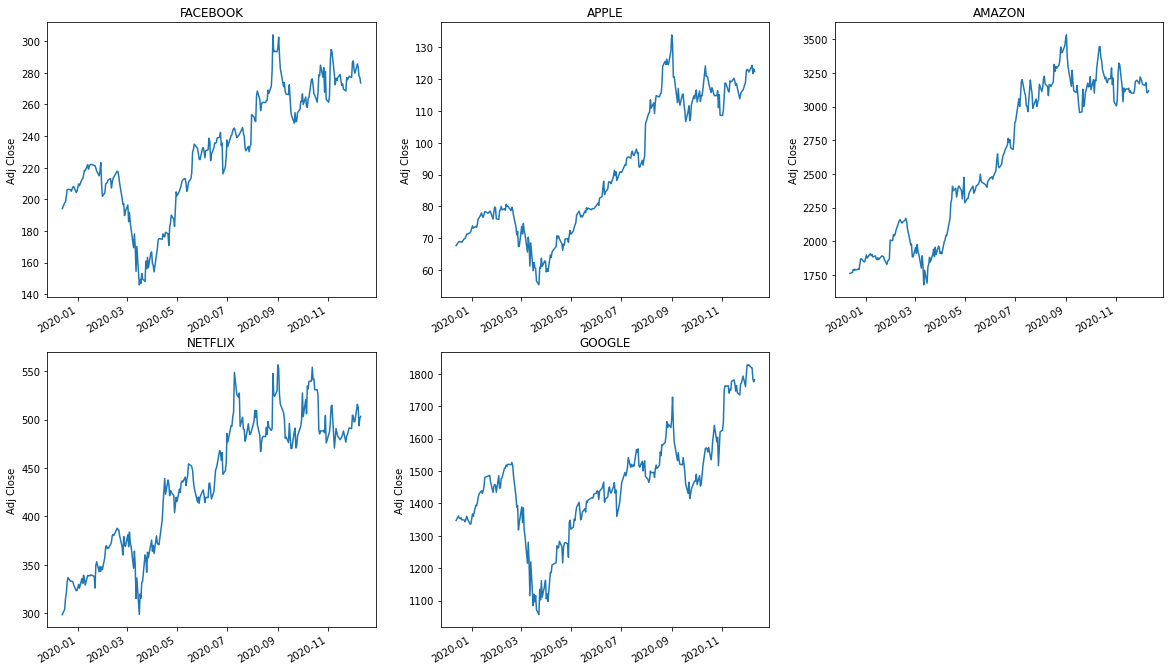

In [171]:
profil_temporel("Adj Close", 20, 8, 2, 3)

### Evolution du volume total des actions négociés

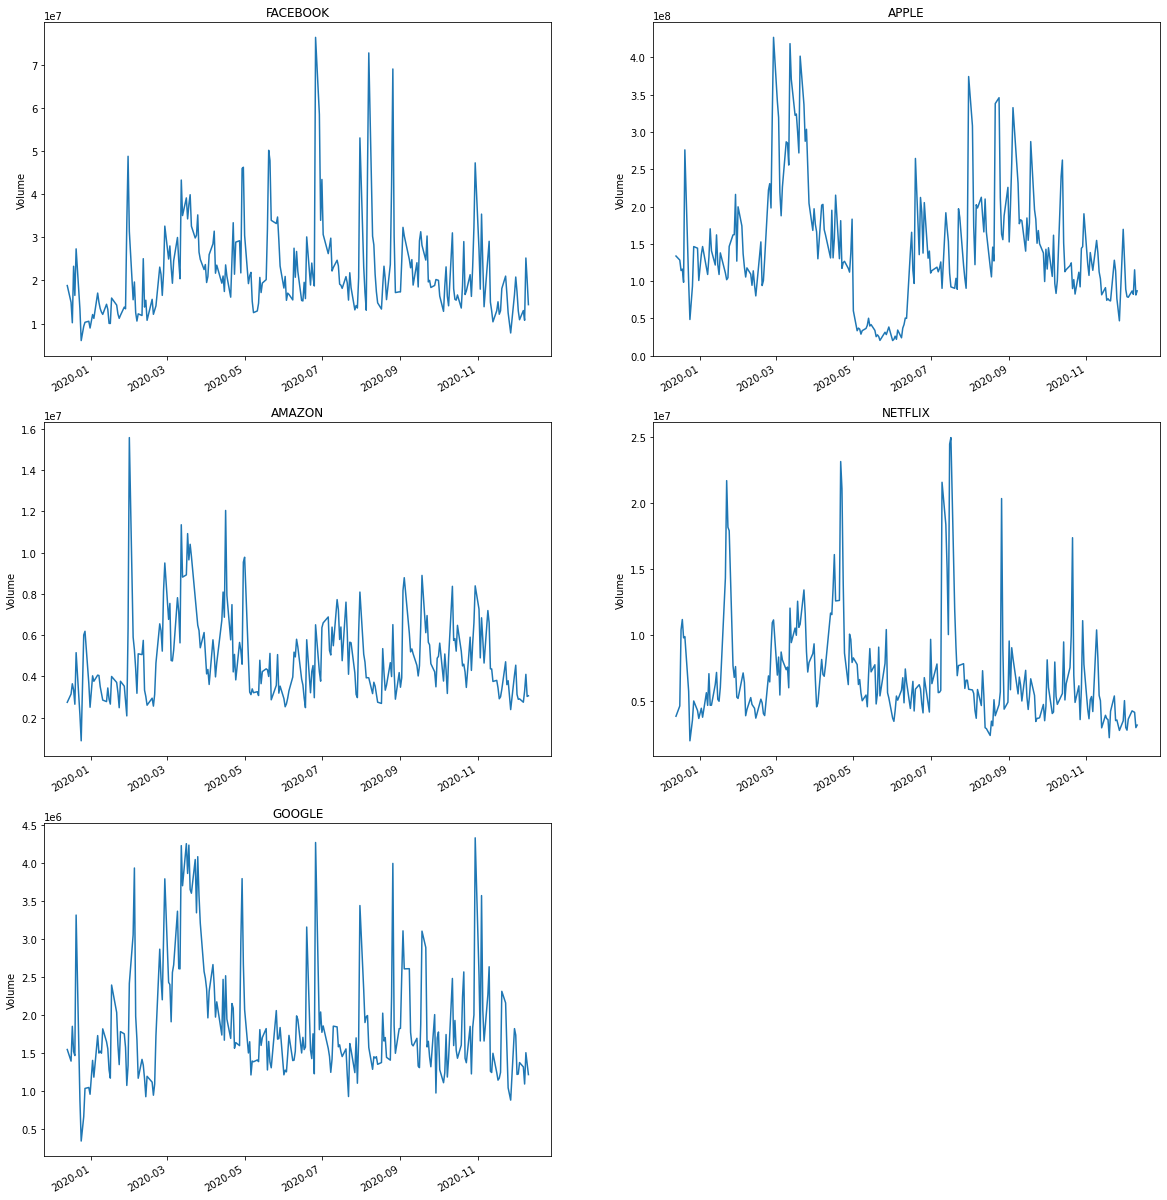

In [177]:
profil_temporel("Volume", 20, 15, 3, 2)

### Etude de la rentabilité des actifs

### Etude de la diversification des actifs

# 3. Modélisation

Nous souhaitons prédire le cours ajustées des actions des FAANG  à la fermeture du marché boursier. Différents types de modèles possibles peuvent être employés : des modéles de séries temporelles linéaires de type ARIMA, ARCH, GARCH, ... ou encore des modèles d'apprentissage statistique de type réseau de neurones. Nous employons ici un modéle de prédiction du deuxième type, plus précisement nous mettons en place un modèle de réseau de neurones récurrents (RNN) afin de modéliser le cours des actions des FAANG. L'idée est de réproduire autant que possible la variabilité à haute fréquence du cours de ces actions. Ainsi, un modèle d'apprentissage de réconnaissance de séquences (ici nos données temporelles) pourrait être préférable. De fait, développons dans la classe des RNN, un réseau Long short-term memory (LSTM). Notons que notre objectif n'est pas de comparer divers classes de modèles, mais plutôt de proposer un modèle qui réprésente au mieux les données avec de bonnes performances de généralisation.  

### Qu'est-ce-que le LSTM ?

##### Le Deep Learning

Le Deep Learning (DL) est le sous-domaine du Machine Learning (ML) qui traite de la construction, de l'architecture et l'implémentation de modèles prédictifs basés sur des réseaux de neuronnes artificiels. 

##### Les réseaux de neurones artificiels, piliers du Deep Learning

Pour la résolution de ses problèmes, le DL fait appel aux réseaux de neurones artificiels. Les réseaux de neurones artificiels, formalisme mathématique des réseaux de neurones bilogiques, utilisent des entrées $\vec{X}$ qu'ils transforment, à l'aide réprésentation non linéaire, en sorties $\vec{y}$ via une architecture bien spécifique.

#####  L'architecture feed-forward

Il s'agit d'un réseau de neurones dans lequel il existe trois niveaux de réprésentation des données : la couche d'entrée, les couches cachées et la couche de sortie. La couche d'entrée est celle qui contient les prédicteurs ou features ou variables d'entrées. Ces features sont ensuite combinées linéairement puis transformées via une fonction non linéaire, dite d'activation, afin d'être connectées aux neurones d'une couche cachée. Le même principe est alors repété d'une couche cachée à une autre tant que l'on souhaite produire autant que possible de la non linéairité dans nos transformations. Enfin, le résultat de la dernière couche cachée est achéminé vers une couche de sortie, toujours par le bias de combinaison lineaire + d'une fonction d'activation, afin de produire une prédiction. 

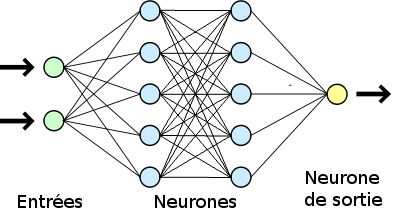

In [183]:
from IPython.display import Image
Image("img_rna.png")


Le challenge du modélisateur est de trouver le nombre de couche cachées adéquat pour l'apprentissage d'un tel réseau de neurones : il faudra éviter autant que possible le surapprentissage.

On peut par exemple utiliser un réseau de neurones feed-forward afin de prédire le label d'un target cible pour lequel on dispose d'un jeu de données d'entrainement annotés : <a href = "https://nextjournal.com/gkoehler/digit-recognition-with-keras"> L'exemple du MNIST</a>.

En réalité, les réseaux de neurones feed-forward conviennent pour le traitement de problématique où le jeu de données d'entrainement est constitué d'observations indépendantes les unes des autres. Que faire alors si ces observations sont séquentielles (séquences de mots) ou temporelles (nos séries temporelles du cours des actions par exemple) ? 

Il faut alors utiliser une autre architecture de réseaux de neurones. Bien souvent, on utilise la classe des réseaux de neurones dits récurrents.

##### L'architecture recurrent neural network

Les réseaux de neurones récurrents permettent modéliser des données séquentielles (et donc des séries temporelles). Dans ces réseaux la sortie d'un neurone d'une couche cachée, au lieu d'être directement transmise à couche suivante, peut être sauvegardée par le neurone afin de produire des dépendances entre ses sorties nouvelles et ses sorties passées : les neurones d'une couche cachée réalisent une sorte de boucle (récurrence) sur elles-mêmes afin de prendre en compte l'information passée. Ainsi ces neurones, contenant un mécanisme de sauvegarde, sont assimilables à des cellules mémoires. Et une cellule suivant le type de réseau de neurones récurrent possède elle-même une artitecture différente.

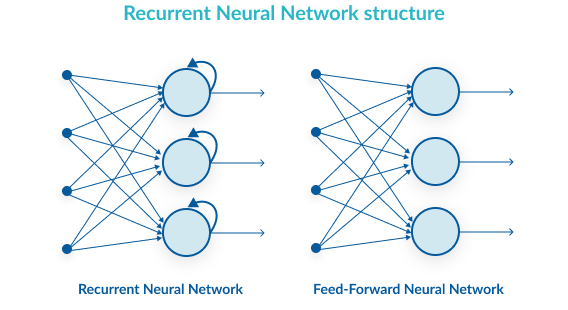

In [195]:
from IPython.display import Image
Image("img_rnn.png")

##### L'architecture LSTM

Le figure que nous présentons ci-dessous est extraite de <a href = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/"> l'article</a> de Christopher Olah, lequel article que nous pensons décrire au mieux et simplement la logique derrière le réseau de neurone LSTM. Au risque de recopier cet article, nous invitons le lecteur cliquer <a href = "https://colah.github.io/posts/2015-08-Understanding-LSTMs/"> sur le lien hypertexte</a>.

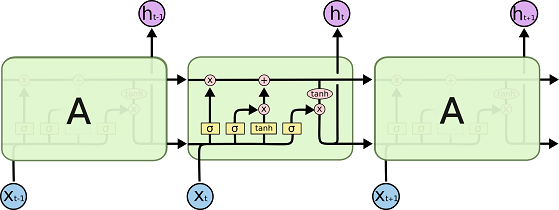

In [194]:
from IPython.display import Image
Image("img_lstm.png")

### Implémentation de notre LSTM

#### Données d'entrainements et preprocessing

In [ ]:
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df

#### Construction du modèle et entrainement

#### Evaluation du modèle et prédiction

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.566676
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.634213
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.774481
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.908023
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.887549
...,...,...,...,...,...,...
2020-12-07,124.570000,122.250000,122.309998,123.750000,86712000.0,123.750000
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997
2020-12-09,125.949997,121.000000,124.529999,121.779999,115089200.0,121.779999


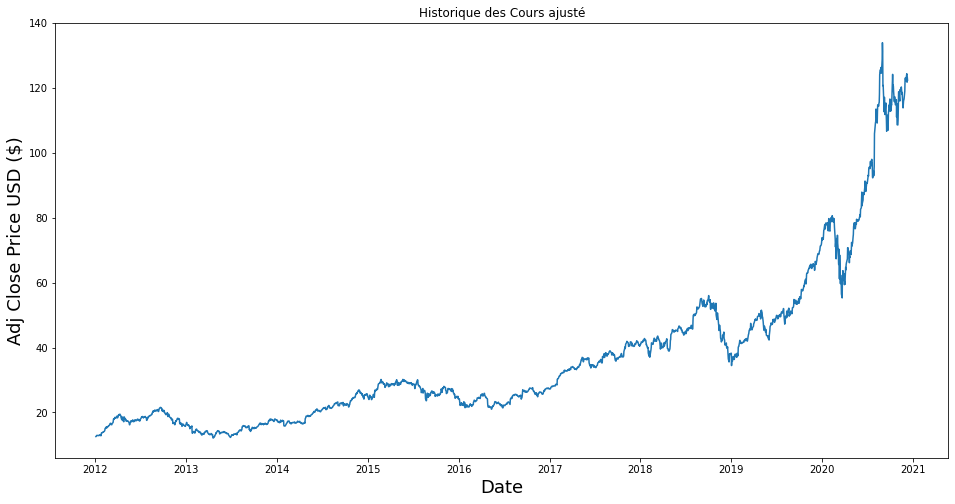

In [51]:
plt.figure(figsize=(16,8))
plt.title('Historique des Cours ajusté')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [56]:
#extraction du target
data = df.filter(['Adj Close'])
#conversion en matrice de valeurs numpy
dataset = data.values

In [59]:
#normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.98748692],
       [-0.98468296],
       [-0.97885945],
       ...,
       [ 3.54674414],
       [ 3.60735921],
       [ 3.57290018]])

In [126]:
training_data_len

1802

In [116]:
#création jeu d'entrainement

#obtention du nombre de ligne du jeu d'entrainement
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

#création du jeu d'entrainement à partir des données normalisées
train_data = scaled_data[0:int(training_data_len), :]

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([-0.98748692, -0.98468296, -0.97885945, -0.97331516, -0.97416516,
       -0.97224949, -0.97312499, -0.97459662, -0.97660122, -0.97039713,
       -0.96480216, -0.96652758, -0.97597959, -0.96695904, -0.97583995,
       -0.94253622, -0.94511161, -0.94174961, -0.93447982, -0.93007745,
       -0.93044544, -0.93180283, -0.92601757, -0.9205748 , -0.91440877,
       -0.90444944, -0.88352839, -0.88321108, -0.8715643 , -0.86286097,
       -0.87781915, -0.87205907, -0.87217341, -0.85602259, -0.85831912,
       -0.85406879, -0.84643121, -0.84218081, -0.82993783, -0.82101891,
       -0.8184434 , -0.81754241, -0.83279239, -0.83647177, -0.83592624,
       -0.82158969, -0.81755531, -0.80888964, -0.78846355, -0.76121147,
       -0.76631172, -0.76629913, -0.74659587, -0.74043015, -0.74481976,
       -0.74882888, -0.75300303, -0.73913606, -0.72962054, -0.72563692])]
[-0.7354818628077764]

[array([-0.98748692, -0.98468296, -0.97885945, -0.97331516, -0.97416516,
       -0.97224949, -0.97312499, -0.9

In [130]:
x_train.shape[1]

60

In [118]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences= False))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
lstm_17 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_21 (Dense)             (None, 25)                2525      
_________________________________________________________________
dense_22 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 26        
Total params: 124,401
Trainable params: 124,401
Non-trainable params: 0
_________________________________________________________________


In [122]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
1742/1742 [==============================] - 23s 13ms/step - loss: 0.0028
Epoch 2/2
1742/1742 [==============================] - 23s 13ms/step - loss: 0.0015


In [123]:
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.7120893922219014

<ipython-input-124-423189b38217>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


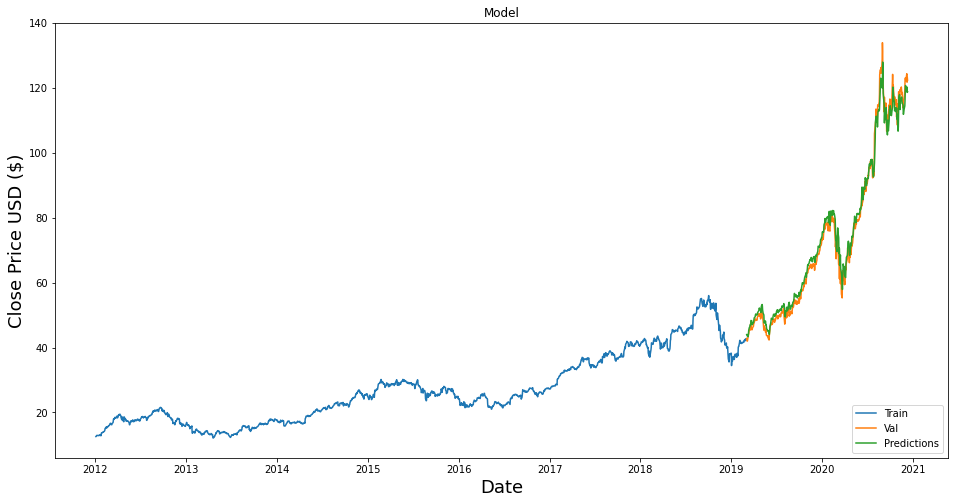

In [124]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [125]:
valid

,Adj Close,Predictions
Date,,
2019-03-05,42.697010,43.998802
2019-03-06,42.451332,44.060936
2019-03-07,41.959972,43.890331
2019-03-08,42.059708,43.463619
2019-03-11,43.516747,43.347546
...,...,...
2020-12-07,123.750000,118.890549
2020-12-08,124.379997,119.403038
2020-12-09,121.779999,120.263435


# Conclusion